# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from citipy import citipy
# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [3]:
# output file
output_data_file = "output_data/cities.csv"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | westport
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | yuzhno-kurilsk
Processing Record 7 of Set 1 | chabahar
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | san pedro pochutla
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | magadan
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | porbandar
Processing Record 21 of Set 1 | taiohae
City not found. Sk

Processing Record 37 of Set 4 | ad dabbah
Processing Record 38 of Set 4 | huarmey
Processing Record 39 of Set 4 | lihue
Processing Record 40 of Set 4 | neftegorsk
Processing Record 41 of Set 4 | nicoya
Processing Record 42 of Set 4 | ndelele
Processing Record 43 of Set 4 | swift current
Processing Record 44 of Set 4 | coin
Processing Record 45 of Set 4 | fort bragg
Processing Record 46 of Set 4 | ituiutaba
Processing Record 47 of Set 4 | lesnoy
Processing Record 48 of Set 4 | zhezqazghan
Processing Record 49 of Set 4 | skovorodino
Processing Record 0 of Set 5 | paredon
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | qamdo
Processing Record 3 of Set 5 | sorong
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | dalby
Processing Record 6 of Set 5 | cozumel
Processing Record 7 of Set 5 | holualoa
Processing Record 8 of Set 5 | dadeldhura
Processing Record 9 of Set 5 | sinop
Processing Record 10 of Set 5 | boyolangu
Processing Record 11 of Set 5 |

Processing Record 32 of Set 8 | howrah
Processing Record 33 of Set 8 | st. john's
Processing Record 34 of Set 8 | rabigh
Processing Record 35 of Set 8 | kingston
Processing Record 36 of Set 8 | kyabe
Processing Record 37 of Set 8 | antsiranana
Processing Record 38 of Set 8 | east grand forks
Processing Record 39 of Set 8 | sisimiut
Processing Record 40 of Set 8 | xining
Processing Record 41 of Set 8 | hithadhoo
Processing Record 42 of Set 8 | kudat
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | colonia
Processing Record 45 of Set 8 | ust'-kut
Processing Record 46 of Set 8 | mancio lima
Processing Record 47 of Set 8 | singapur
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | regina
Processing Record 0 of Set 9 | sinabang
Processing Record 1 of Set 9 | fiambala
Processing Record 2 of Set 9 | sibsagar
Processing Record 3 of Set 9 | ghat
Processing Record 4 of Set 9 | kurtamysh
Processing Record 5 of Set 9 | santo antonio da platina
Pr

Processing Record 24 of Set 12 | arawa
Processing Record 25 of Set 12 | menongue
Processing Record 26 of Set 12 | erenhot
Processing Record 27 of Set 12 | kinston
Processing Record 28 of Set 12 | taco pozo
Processing Record 29 of Set 12 | kapenguria
Processing Record 30 of Set 12 | coelho neto
Processing Record 31 of Set 12 | cordeiro
Processing Record 32 of Set 12 | ciudad lazaro cardenas
Processing Record 33 of Set 12 | ceerigaabo
Processing Record 34 of Set 12 | lembar
City not found. Skipping...
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | carbondale
Processing Record 37 of Set 12 | ostroleka
Processing Record 38 of Set 12 | port saint john's
Processing Record 39 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 40 of Set 12 | winona
Processing Record 41 of Set 12 | baley
Processing Record 42 of Set 12 | noosa heads
Processing Record 43 of Set 12 | naze
Processing Record 44 of Set 12 | vredendal
Processing Record 45 of Set 12 | prince

In [5]:
# Convert the cities weather data into a Pandas DataFrame
  # Append the City information into city_data list
#city_data  = {     "City": city, 
                         # "Lat": city_lat, 
                         # "Lng": city_lng, 
                         # "Max Temp": city_max_temp,
                         # "Humidity": city_humidity,
                         # "Cloudiness": city_clouds,
                         # "Wind Speed": city_wind,
                         # "Country": city_country,
                         # "Date": city_date
        #
        

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.82,93,91,11.00,TF,1682474385
1,kodiak,57.7900,-152.4072,3.73,87,100,6.69,US,1682474449
2,westport,41.1415,-73.3579,10.49,66,66,0.45,US,1682474410
3,utrik,11.2278,169.8474,27.09,79,93,10.07,MH,1682474439
4,port mathurin,-19.6833,63.4167,25.84,79,13,6.20,MU,1682474441


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,93,91,11.00,TF,1682474385
1,kodiak,57.7900,-152.4072,3.73,87,100,6.69,US,1682474449
2,westport,41.1415,-73.3579,10.49,66,66,0.45,US,1682474410
3,utrik,11.2278,169.8474,27.09,79,93,10.07,MH,1682474439
4,port mathurin,-19.6833,63.4167,25.84,79,13,6.20,MU,1682474441


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

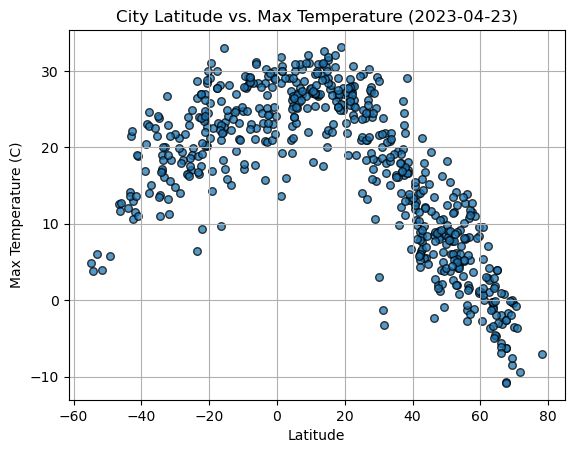

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-04-23)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

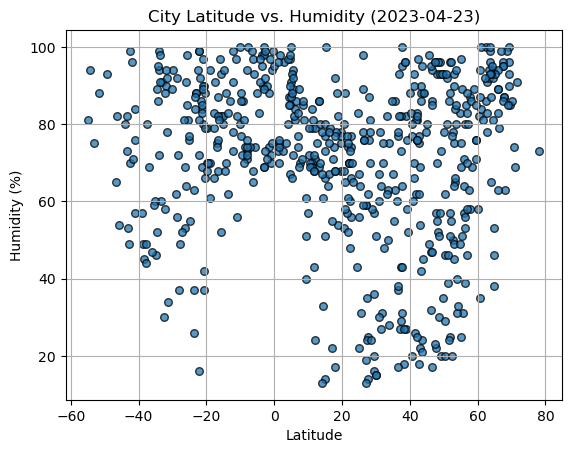

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-04-23)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

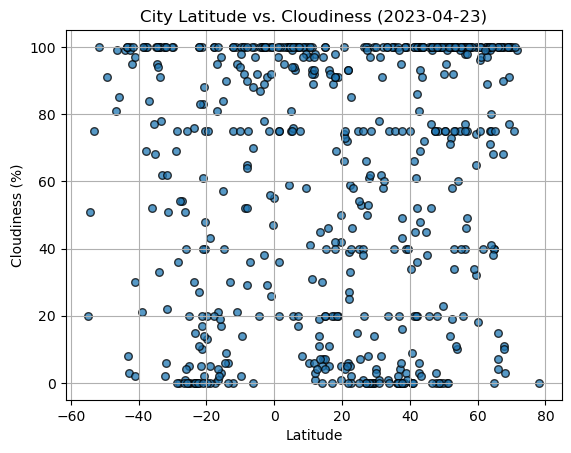

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-04-23)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Lat_cloudy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

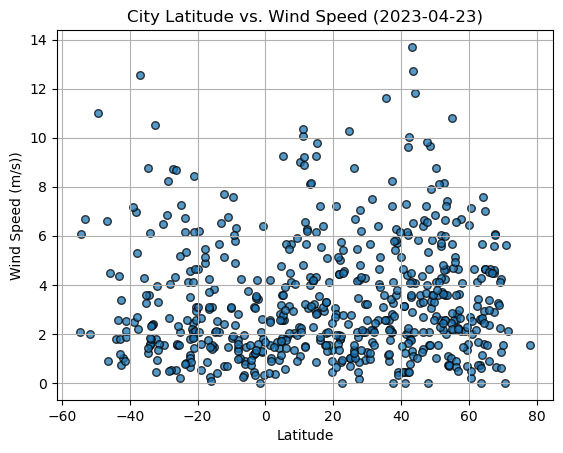

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-04-23)')
plt.ylabel('Wind Speed (m/s))')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Lat_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,3.73,87,100,6.69,US,1682474449
2,westport,41.1415,-73.3579,10.49,66,66,0.45,US,1682474410
3,utrik,11.2278,169.8474,27.09,79,93,10.07,MH,1682474439
5,yuzhno-kurilsk,44.0306,145.8556,5.51,88,100,11.84,RU,1682474542
6,chabahar,25.2919,60.6430,24.91,64,7,2.78,IR,1682474542


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 ),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,93,91,11.00,TF,1682474385
4,port mathurin,-19.6833,63.4167,25.84,79,13,6.20,MU,1682474441
7,edinburgh of the seven seas,-37.0676,-12.3116,15.03,69,84,12.55,SH,1682474385
9,namibe,-15.1961,12.1522,23.35,80,84,1.47,AO,1682474515
13,bredasdorp,-34.5322,20.0403,13.75,89,95,1.23,ZA,1682474384


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.798


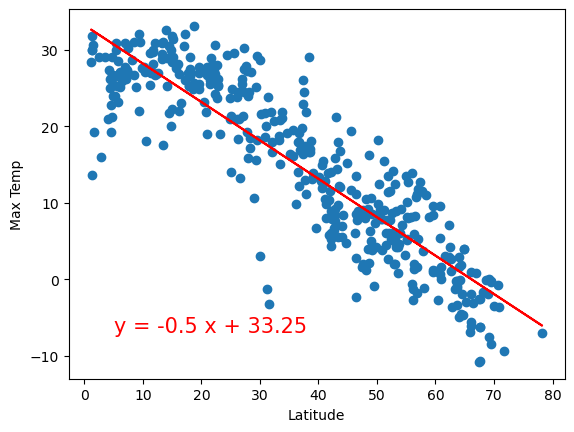

In [15]:
# Linear regression on Northern Hemisphere

(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(5, -7), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.429


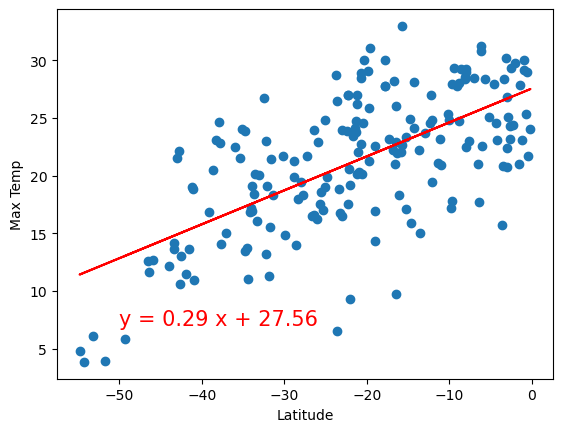

In [16]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 7), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.749. This means the strong relationship between Latitude and Max Temp. Temperature decreases also Latitude increases from the equator.
In southern Hemisphere , the regression value is 0.584. This means the week relationship between Latitude and Max Temp. Remperature increases , Latitude increses. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004


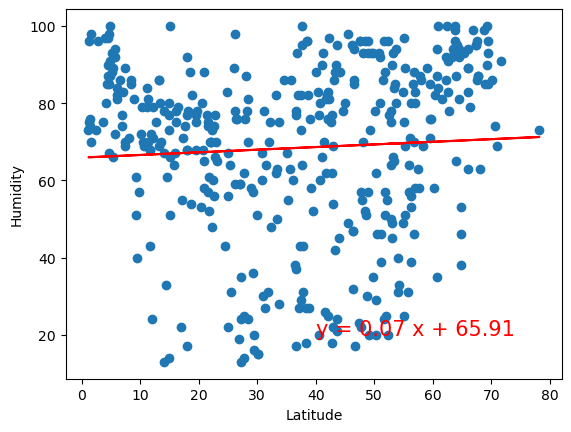

In [17]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.064


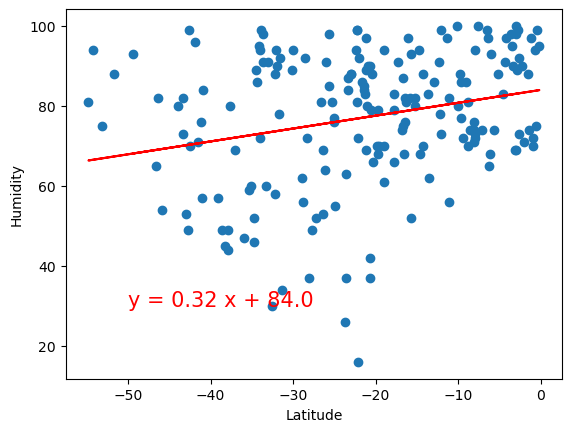

In [18]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.022. This means very weak relationship between Latitude and Humidity. Humidity increases also Latitude increases from the equator. partially cities humid with highest %. partially less.
In southern Hemisphere , the regression value is 0.011. This means very week relationship between Latitude and Humidity. almost 70% cities affected with humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.018


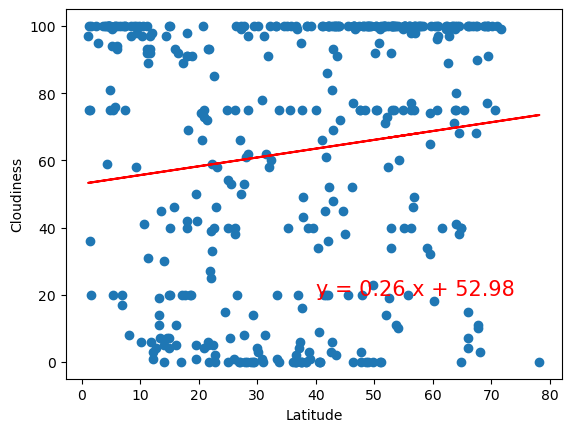

In [19]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.0


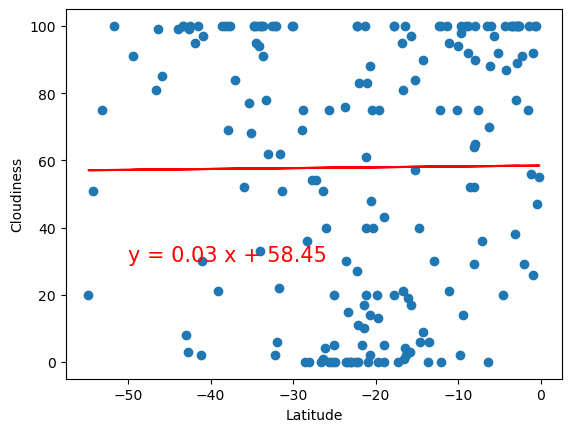

In [20]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.023. This means very weak relationship between Latitude and Cloudiness. Cloudiness increases also Latitude increases from the equator. partially cities affected less cloudiness, the other cities are more cloudy.
In southern Hemisphere , the regression value is 0.017. This means very week relationship between Latitude and Cloudiness. Most cities affected cloudiness near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


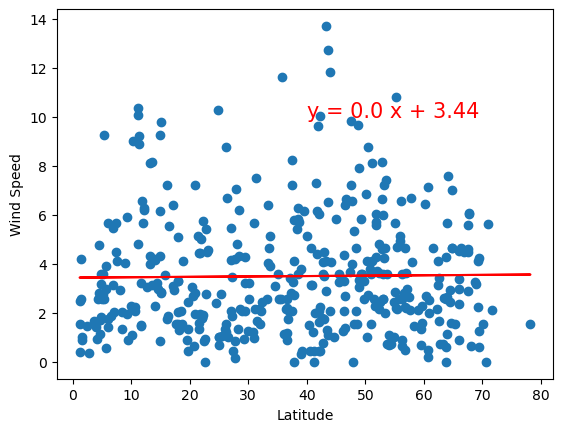

In [21]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 10), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.047


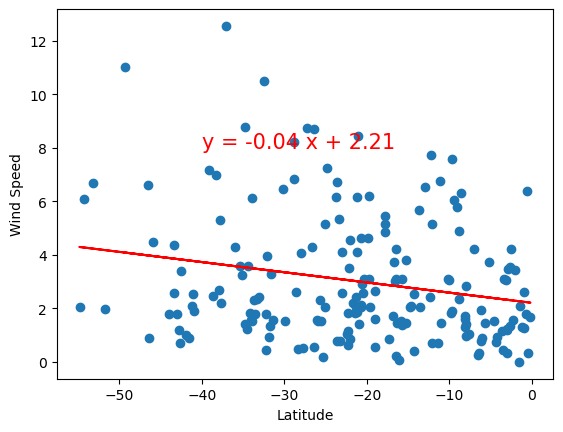

In [22]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-40, 8), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.0. This means very weak relationship between Latitude and Wind Speed. Wind Speed increases also Latitude increases from the equator. windspeed effected more cities in northern hemisphere.
In southern Hemisphere , the regression value is 0.035. This means very week relationship between Latitude and Wind Speed. Remperature decreases , Latitude decreases too. Latitude decreases away from the equator. wind speed is not that much effected in southern hemisphere cities compared to northern.